# **Veri Seti Düzenlenmesi **

In [1]:
from google.colab import drive
import pandas as pd # veri işleme
import numpy as np # veri işleme diziler için
import seaborn as sns
excel_path = '/Telco-Customer-Churn.xlsx'
dt = pd.read_excel(excel_path)
#burada ilk 10 veriyi ekranda gösterdik
dt.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# **Dataset Analizi**

In [25]:
#verisetinin yapısını gösterir
dt.shape
(7043, 21)

(7043, 21)

In [2]:
#Veri setindeki değişkenlerin tipini gösterir
dt.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
#Toplam kaç hücrede eksik değer (NaN ya da None) var
dt.isnull().sum().sum()

0

In [4]:
#Özniteliklerin değer almadığı kaç satır varr
dt.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

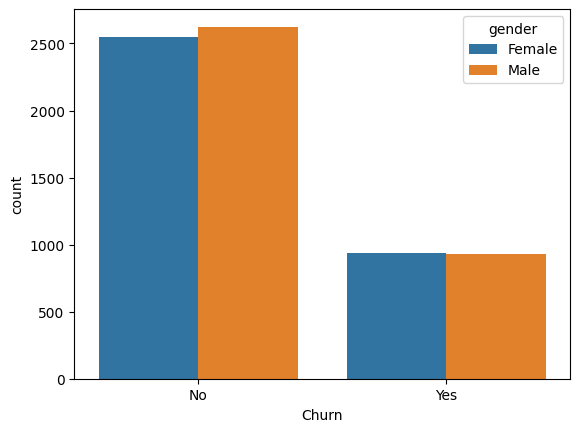

In [5]:
#cinsiyete göre chrun durumu
sns.countplot(x = "Churn" , data = dt, hue = "gender")


<Axes: xlabel='gender', ylabel='Count'>

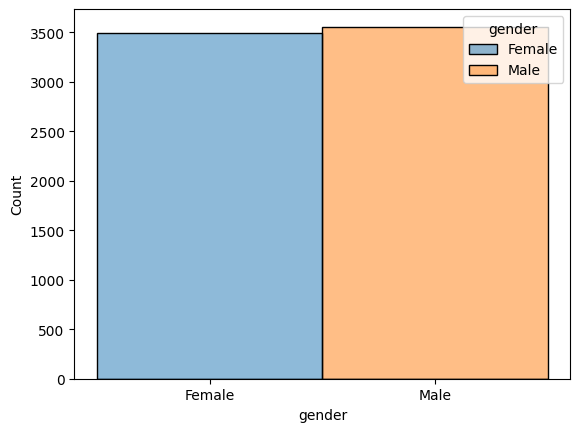

In [6]:
#farklı kütüphaneyle deneme
sns.histplot(x = "gender", data = dt, hue = "gender")


<Axes: ylabel='Frequency'>

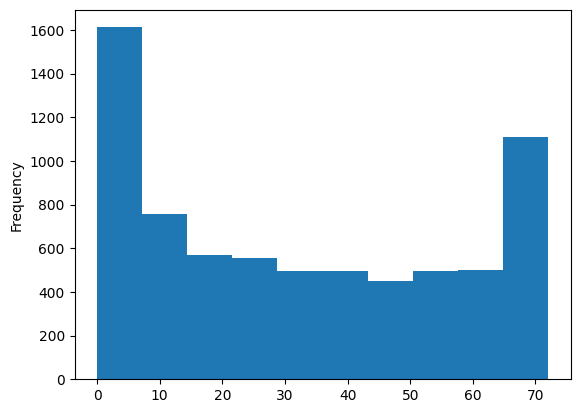

In [7]:
#tenure süreleri grafik gösterimi
dt['tenure'].plot.hist()

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

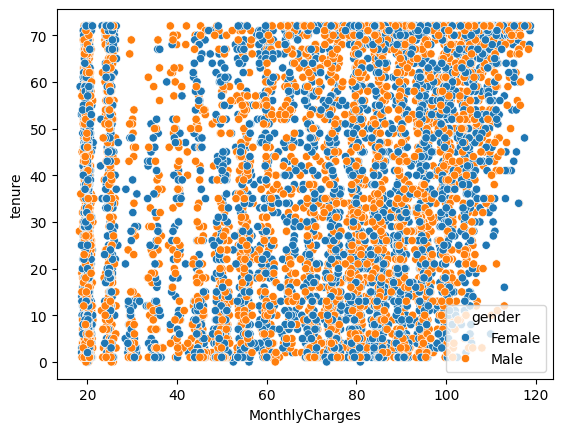

In [8]:
# Boş değerleri içeren satırları kaldır
dt = dt.dropna(subset=['TotalCharges', 'MonthlyCharges'])

# 'TotalCharges' sütunundaki değerleri sayısal bir formata dönüştür
dt['TotalCharges'] = pd.to_numeric(dt['TotalCharges'], errors='coerce')

# 'MonthlyCharges' sütunundaki değerleri sayısal bir formata dönüştür
dt['MonthlyCharges'] = pd.to_numeric(dt['MonthlyCharges'], errors='coerce')

# Scatter plot çizimi
sns.scatterplot(x="MonthlyCharges",y ="tenure", data=dt, hue = "gender")


<Axes: xlabel='PaymentMethod', ylabel='count'>

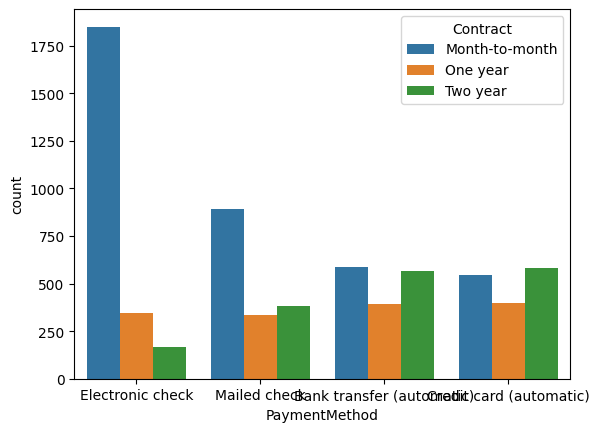

In [9]:
sns.countplot(x = "PaymentMethod" , data = dt, hue = "Contract")

# **Veri Setinine Veri temizleme ve veri ön işlemlerinin Yapılması**

In [28]:
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
#dummy için kendim seçtim
X = dt[['gender','tenure','MonthlyCharges','InternetService','PhoneService','DeviceProtection','OnlineSecurity',
        'TechSupport','Contract','PaperlessBilling','PaymentMethod','SeniorCitizen','Churn']]
X

,gender,tenure,MonthlyCharges,InternetService,PhoneService,DeviceProtection,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,Churn
0,Female,1,29.85,DSL,No,No,No,No,Month-to-month,Yes,Electronic check,0,No
1,Male,34,56.95,DSL,Yes,Yes,Yes,No,One year,No,Mailed check,0,No
2,Male,2,53.85,DSL,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,0,Yes
3,Male,45,42.30,DSL,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),0,No
4,Female,2,70.70,Fiber optic,Yes,No,No,No,Month-to-month,Yes,Electronic check,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,24,84.80,DSL,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0,No
7039,Female,72,103.20,Fiber optic,Yes,Yes,No,No,One year,Yes,Credit card (automatic),0,No
7040,Female,11,29.60,DSL,No,No,Yes,No,Month-to-month,Yes,Electronic check,0,No
7041,Male,4,74.40,Fiber optic,Yes,No,No,No,Month-to-month,Yes,Mailed check,1,Yes


In [30]:
# Dummies oluşturma
y = pd.get_dummies(X[['gender','tenure','MonthlyCharges','InternetService','PhoneService','DeviceProtection','OnlineSecurity','TechSupport','Contract','PaperlessBilling','PaymentMethod','SeniorCitizen','Churn']],drop_first=True, dtype=bool)

# Orijinal sütunları kaldırma
X = X.drop(['gender','tenure','MonthlyCharges','InternetService','PhoneService','DeviceProtection','OnlineSecurity',
            'TechSupport','Contract','PaperlessBilling','PaymentMethod','SeniorCitizen','Churn'], axis=1)

# Dummies sütunlarını X veri çerçevesine ekleyerek yeni veri çerçevesini oluşturma
X = pd.concat([X, y], axis=1)

# İlk birkaç satırı görüntüleme
X.head()


,tenure,MonthlyCharges,SeniorCitizen,gender_Male,InternetService_Fiber optic,InternetService_No,PhoneService_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,34,56.95,0,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False
2,2,53.85,0,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True
3,45,42.30,0,True,False,False,False,False,True,False,True,False,True,True,False,False,False,False,False,False
4,2,70.70,0,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True


In [31]:
x = X.drop('Churn_Yes', axis = 1)
#Elimizdeki verileri direk sayısal temsillerine dönüştürmeye yarar ve kategorik
#her veriye sayısal bir değer atar. Genelde iki değere sahip veya tekrarlı özniteliklerde kullanılır.
#https://medium.com/@denizkilinc/python-ile-veri-%C3%B6n-i%CC%87%C5%9Flemeye-dal%C4%B1%C5%9F-f89f921658bd
#noramlizasyon
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler objesini oluşturma
scaler = MinMaxScaler()

# Verileri normalleştirme işlemi
X_normalized = scaler.fit_transform(x)

# Normalleştirilmiş verilerle yeni bir DataFrame oluşturma
X_normalized_df = pd.DataFrame(X_normalized, columns=x.columns)
x = X_normalized_df
# İlk birkaç satırı görüntüleme
X_normalized_df.head()



,tenure,MonthlyCharges,SeniorCitizen,gender_Male,InternetService_Fiber optic,InternetService_No,PhoneService_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.472222,0.385075,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.027778,0.354229,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.625000,0.239303,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.027778,0.521891,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [32]:
from sklearn import preprocessing
columns_to_encode = ['Churn']
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(dt['Churn'])
x.head()

,tenure,MonthlyCharges,SeniorCitizen,gender_Male,InternetService_Fiber optic,InternetService_No,PhoneService_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.472222,0.385075,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.027778,0.354229,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.625000,0.239303,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.027778,0.521891,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [33]:
X.head()

,tenure,MonthlyCharges,SeniorCitizen,gender_Male,InternetService_Fiber optic,InternetService_No,PhoneService_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,34,56.95,0,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False
2,2,53.85,0,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True
3,45,42.30,0,True,False,False,False,False,True,False,True,False,True,True,False,False,False,False,False,False
4,2,70.70,0,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True


# **k-En Yakın Komşu (k-Nearest Neighbors - kNN) algoritması**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# kNN modelini oluşturma ve eğitme
knn = KNeighborsClassifier(n_neighbors=13) # 13 en az komşu en çok doğruluk payı elde edildi
knn.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = knn.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Sonuçları yazdırma
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Doğruluk (Accuracy): 0.80
Geri Çağırma (Recall): 0.55
Hassasiyet (Precision): 0.64
F1 Score: 0.59


## featured selection with knn

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd


# Apply feature selection using SelectKBest with chi-squared scoring
selector = SelectKBest(score_func=chi2, k=10)  # You can adjust the value of 'k' as needed
X_selected = selector.fit_transform(x, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=13)  # Adjust the value of 'n_neighbors' as needed
knn.fit(X_train, y_train)

# Test the classifier
y_pred = knn.predict(X_test)

# Calculate performance metrics including F1 score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.79
Recall: 0.55
Precision: 0.63
F1 Score: 0.59


# **Naive Bayes**

*   MultinomialNB
*   GaussianNB
*   BernoulliNB





In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
import pandas as pd

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=28)

# Naive Bayes modelini oluşturma ve eğitme
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = naive_bayes.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sonuçları yazdırma
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score {:.2f}".format(f1))

Doğruluk (Accuracy): 0.70
Geri Çağırma (Recall): 0.85
Hassasiyet (Precision): 0.45
F1 Score 0.59


## Feature Selection NB

In [21]:
from sklearn.feature_selection import SelectKBest, chi2

# Selecting the top k features
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Naive Bayes modelini oluşturma ve eğitme
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_selected, y_train)

# Test seti üzerinde tahmin yapma
y_pred = naive_bayes.predict(X_test_selected)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]


# Sonuçları yazdırma
print("Selected Features:", selected_feature_names.tolist())
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score {:.2f}".format(f1))

Selected Features: ['tenure', 'InternetService_Fiber optic', 'InternetService_No', 'DeviceProtection_No internet service', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'TechSupport_No internet service', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check']
Doğruluk (Accuracy): 0.69
Geri Çağırma (Recall): 0.85
Hassasiyet (Precision): 0.44
F1 Score 0.58


## MultinomialNB, BernoulliNB


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Kategorik öznitelikleri ikili (dummy) değişkenlere dönüştürme

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Multinomial Naive Bayes modelini oluşturma ve eğitme
# alpha parametresi varsayılan olarak 1.0'dır, ancak isteğe bağlı olarak ayarlanabilir
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)

# Bernoulli Naive Bayes modelini oluşturma ve eğitme
# alpha parametresi varsayılan olarak 1.0'dır, ancak isteğe bağlı olarak ayarlanabilir
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_multinomial = multinomial_nb.predict(X_test)
y_pred_bernoulli = bernoulli_nb.predict(X_test)

# Performans metriklerini hesaplama
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
recall_multinomial = recall_score(y_test, y_pred_multinomial)
precision_multinomial = precision_score(y_test, y_pred_multinomial)
f1 = f1_score(y_test, y_pred_bernoulli)

accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
recall_bernoulli = recall_score(y_test, y_pred_bernoulli)
precision_bernoulli = precision_score(y_test, y_pred_bernoulli,)
f1 = f1_score(y_test, y_pred)

# Sonuçları yazdırma
print("Multinomial Naive Bayes:")
print("Doğruluk (Accuracy): {:.2f}".format(accuracy_multinomial))
print("Geri Çağırma (Recall): {:.2f}".format(recall_multinomial))
print("Hassasiyet (Precision): {:.2f}".format(precision_multinomial))
print("F1 Score {:.2f}".format(f1))

print("\nBernoulli Naive Bayes:")
print("Doğruluk (Accuracy): {:.2f}".format(accuracy_bernoulli))
print("Geri Çağırma (Recall): {:.2f}".format(recall_bernoulli))
print("Hassasiyet (Precision): {:.2f}".format(precision_bernoulli))
print("F1 Score {:.2f}".format(f1))


Multinomial Naive Bayes:
Doğruluk (Accuracy): 0.77
Geri Çağırma (Recall): 0.71
Hassasiyet (Precision): 0.55
F1 Score 0.35

Bernoulli Naive Bayes:
Doğruluk (Accuracy): 0.75
Geri Çağırma (Recall): 0.74
Hassasiyet (Precision): 0.53
F1 Score 0.35


## Featured Selected NaiveBase

In [24]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Load the unprocessed dataset
excel_path = '/Telco-Customer-Churn.xlsx'
dt = pd.read_excel(excel_path)

# Apply one-hot encoding to categorical variables
X_encoded = pd.get_dummies(dt.drop('Churn', axis=1), drop_first=True)
y = dt['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Apply feature selection using Mutual Information
k = 10  # Number of features to select
selector = SelectKBest(mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = X_encoded.columns[selected_feature_indices]

# Train a Naive Bayes classifier on the selected features
nb_model = GaussianNB()
nb_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Sonuçları yazdırma
print("Selected Features:", selected_features.tolist())
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score {:.2f}".format(f1))


Selected Features: ['tenure', 'MonthlyCharges', 'InternetService_Fiber optic', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'Contract_Two year', 'PaymentMethod_Electronic check']
Doğruluk (Accuracy): 0.59
Geri Çağırma (Recall): 0.92
Hassasiyet (Precision): 0.39
F1 Score 0.55


# **Lineer destek vektör makinesi (Linear Support Vector Machine - LinearSVM)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd


# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# LinearSVC modelini oluşturma ve eğitme
# C parametresini düzenlemek için kullanılır
linear_svm = LinearSVC(dual=False)
linear_svm.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = linear_svm.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Sonuçları yazdırma
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Doğruluk (Accuracy): 0.80
Geri Çağırma (Recall): 0.54
Hassasiyet (Precision): 0.67
F1 Score: 0.60


## Feature Selection LinearSVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd


# Apply feature selection
linear_svm = LinearSVC(dual=False)  # Define LinearSVM model
selector = SelectFromModel(linear_svm, max_features=10)  # Feature selector
X_selected = selector.fit_transform(x, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train the LinearSVM classifier
linear_svm = LinearSVC(dual=False)
linear_svm.fit(X_train, y_train)

# Test the classifier
y_pred = linear_svm.predict(X_test)

# Calculate performance metrics including F1 score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Print performance metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.80
Recall: 0.49
Precision: 0.67
F1 Score: 0.57


# **RBF (Radial Basis Function) çekirdeği ile Destek Vektör Makinesi (Support Vector Machine - SVM)**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# RBF SVM modelini oluşturma ve eğitme
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = rbf_svm.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Sonuçları yazdırma
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Doğruluk (Accuracy): 0.80
Geri Çağırma (Recall): 0.48
Hassasiyet (Precision): 0.68
F1 Score: 0.56


## Feature Selection RBF (Radial Basis Function) çekirdeği ile Destek Vektör Makinesi (Support Vector Machine - SVM)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply feature selection using SelectKBest with chi-squared scoring
selector = SelectKBest(score_func=chi2, k=10)  # 'all' selects all features, you can specify the number of features you want
X_selected = selector.fit_transform(x, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train the SVM classifier
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

# Test the classifier
y_pred = rbf_svm.predict(X_test)

# Calculate performance metrics including F1 score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Yes' )
precision = precision_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Print performance metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))



Accuracy: 0.79
Recall: 0.49
Precision: 0.65
F1 Score: 0.56


# **Random Forest**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Random Forest modelini oluşturma ve eğitme
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = random_forest.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Sonuçları yazdırma
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Doğruluk (Accuracy): 0.78
Geri Çağırma (Recall): 0.47
Hassasiyet (Precision): 0.64
F1 Score: 0.54


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=14)

# Karar Ağacı modelini oluşturma ve eğitme
decision_tree = DecisionTreeClassifier(max_depth=5) # Maksimum derinliği sınırlayarak modeli basitleştiriyoruz
decision_tree.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = decision_tree.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Sonuçları yazdırma
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Doğruluk (Accuracy): 0.79
Geri Çağırma (Recall): 0.58
Hassasiyet (Precision): 0.58
F1 Score: 0.58


## Random Forest Feature Selection



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
import numpy as np

# Apply one-hot encoding to categorical variables
X_encoded = pd.get_dummies(dt.drop('Churn', axis=1), drop_first=True)
y = dt['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Apply feature selection using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

# Select features with importance score greater than a threshold
num_features_to_select = 13
selected_features_indices = (-feature_importances).argsort()[:num_features_to_select]
selected_features = X_encoded.columns[selected_features_indices]
X_selected = X_encoded[selected_features]

# Split the selected features into training and testing sets
X_train_selected, X_test_selected = X_train[selected_features], X_test[selected_features]

# Train a machine learning model on the selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Sonuçları yazdırma
print("Selected Features:", selected_features.tolist())
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score {:.2f}".format(f1))


Selected Features: ['tenure', 'MonthlyCharges', 'Contract_Two year', 'PaymentMethod_Electronic check', 'OnlineSecurity_Yes', 'InternetService_Fiber optic', 'Contract_One year', 'TechSupport_Yes', 'PaperlessBilling_Yes', 'Partner_Yes', 'OnlineBackup_Yes', 'gender_Male', 'SeniorCitizen']
Doğruluk (Accuracy): 0.79
Geri Çağırma (Recall): 0.50
Hassasiyet (Precision): 0.65
F1 Score 0.57


# **çok katmanlı algılayıcıları (MLP)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd



# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# MLP modelini oluşturma ve eğitme
mlp = MLPClassifier(max_iter=500) # Görünür katmanlarda 100, gizli katmanlarda 50 nöron
mlp.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = mlp.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Sonuçları yazdırma
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Doğruluk (Accuracy): 0.79
Geri Çağırma (Recall): 0.48
Hassasiyet (Precision): 0.67
F1 Score: 0.56


## Feature Selection MLP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd


# Apply feature selection
selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(x, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train the MLP classifier
mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train, y_train)

# Test the classifier
y_pred = mlp.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Sonuçları yazdırma
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Doğruluk (Accuracy): 0.79
Geri Çağırma (Recall): 0.50
Hassasiyet (Precision): 0.66
F1 Score: 0.57


# **XGBoost (eXtreme Gradient Boosting)**

In [31]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# XGBoost modelini oluşturma ve eğitme
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = xgboost.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sonuçları yazdırma
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Doğruluk (Accuracy): 0.79
Geri Çağırma (Recall): 0.52
Hassasiyet (Precision): 0.63
F1 Score: 0.57


## Feature Selection with XGBoost

In [33]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Apply feature selection
xgboost = xgb.XGBClassifier()
selector = SelectFromModel(xgboost)
X_selected = selector.fit_transform(x, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Train the XGBoost classifier
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

# Test the classifier
y_pred = xgboost.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sonuçları yazdırma
print("Doğruluk (Accuracy): {:.2f}".format(accuracy))
print("Geri Çağırma (Recall): {:.2f}".format(recall))
print("Hassasiyet (Precision): {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Doğruluk (Accuracy): 0.77
Geri Çağırma (Recall): 0.65
Hassasiyet (Precision): 0.57
F1 Score: 0.61
